In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [141]:
baseline = pd.read_csv("baseline-3.csv",index_col=0)
nvlink = pd.read_csv("nvlink_overhead-3.2.fixed.csv",index_col=0)

In [142]:
def prepare_data(df):
    df["oom"] = df["accuracy"] == "out of memory"
    df.loc[df["accuracy"] == "out of memory","accuracy"] = np.nan
    df["accuracy"] = pd.to_numeric(df["accuracy"])
    df["dead_kernels"] = df["dead_kernels"].apply(json.loads)
    return df

In [143]:
baseline = prepare_data(baseline)
nvlink = prepare_data(nvlink)

In [145]:
nvlink

,accuracy,duration,dead_kernels,oom
0,0.900,18.028267,[],False
1,0.900,17.184083,[],False
2,0.775,16.447560,[],False
3,0.800,16.692782,[],False
4,0.875,17.720356,[],False
5,0.875,16.762239,[],False
6,0.875,18.328585,[],False
7,0.900,17.034329,[],False
8,0.900,17.375880,[],False
9,0.900,18.542785,[],False


In [146]:
nvlink["all_alive"] = nvlink["dead_kernels"].apply(len) == 0
nvlink

,accuracy,duration,dead_kernels,oom,all_alive
0,0.900,18.028267,[],False,True
1,0.900,17.184083,[],False,True
2,0.775,16.447560,[],False,True
3,0.800,16.692782,[],False,True
4,0.875,17.720356,[],False,True
5,0.875,16.762239,[],False,True
6,0.875,18.328585,[],False,True
7,0.900,17.034329,[],False,True
8,0.900,17.375880,[],False,True
9,0.900,18.542785,[],False,True


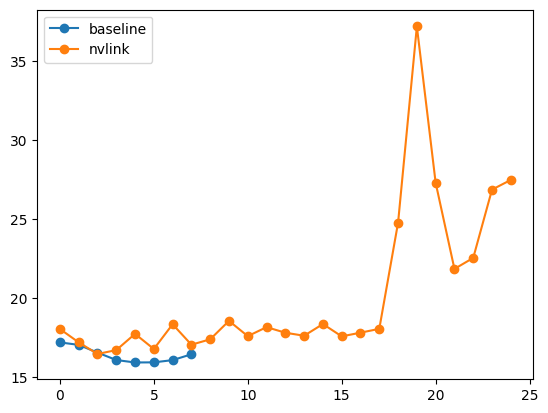

In [154]:
baseline[baseline["oom"] == False]["duration"].plot(marker="o", label="baseline")
nvlink[nvlink["oom"] == False]["duration"].plot(marker="o", label="nvlink")
plt.legend()

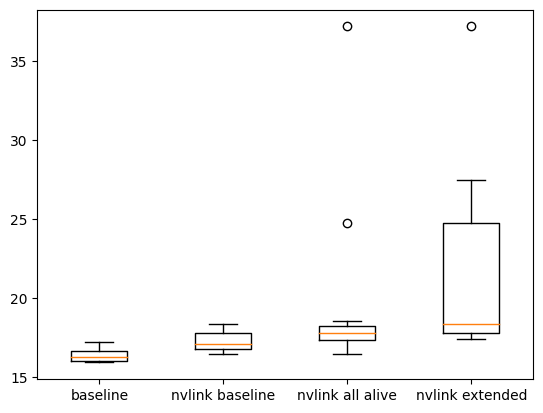

In [147]:
baseline_range = baseline["oom"] == False
alive_range = nvlink["all_alive"] == True

boxplot_data = {
    "baseline": baseline[baseline_range]["duration"],
    "nvlink baseline": nvlink[baseline_range]["duration"],
    "nvlink all alive": nvlink[alive_range]["duration"],
    "nvlink extended": nvlink[~baseline_range]["duration"],
}

plt.boxplot(boxplot_data.values(), labels=boxplot_data.keys());

In [128]:
((pd.DataFrame(boxplot_data).mean()["nvlink baseline"] / pd.DataFrame(boxplot_data).mean()["baseline"]) - 1) * 100

5.395955298425825

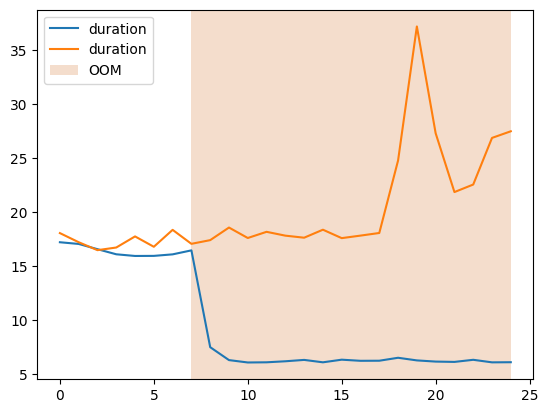

In [96]:
baseline["duration"].plot()
nvlink["duration"].plot()
plt.axvspan(baseline[baseline["oom"] == False].last_valid_index(),baseline["oom"].last_valid_index(), alpha=0.2, facecolor="#CC5500", label="OOM")
plt.legend()

<Axes: >

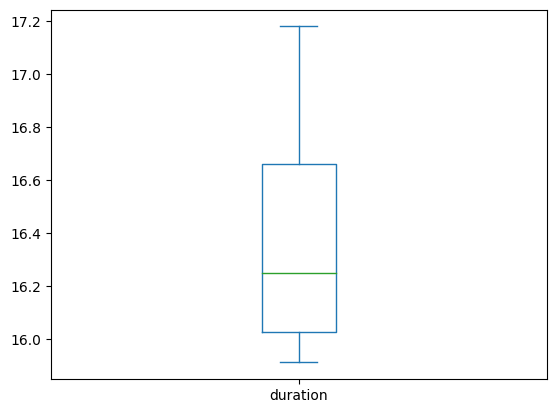

In [50]:
df[df["oom"] == False]["duration"].plot.box()